<a href="https://colab.research.google.com/github/zpetey28/IS4487_ZackPeterson/blob/main/Copy_of_lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 6 with the *SuperStore Retail Orders* dataset

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Data_Analytics/Lab 6/superstore_retail_orders.csv'
df = pd.read_csv(file_path)

df.describe()


# Include description for all columns including non-numeric
print(df.describe(include='all'))

# Check for any null values in the DataFrame
print(df.isnull().sum())

# Check the shape of the DataFrame to confirm the record count
print(f"Shape of the DataFrame: {df.shape}")

        customer_id       customer_name  address_line_1        city  \
count   9569.000000                9569            9448        9516   
unique          NaN                 764             744         261   
top             NaN  Eadmund Lancashire  739 Rusk Trail  Washington   
freq            NaN                  36              36         393   
mean     282.910962                 NaN             NaN         NaN   
std      199.763947                 NaN             NaN         NaN   
min        1.000000                 NaN             NaN         NaN   
25%      127.000000                 NaN             NaN         NaN   
50%      253.000000                 NaN             NaN         NaN   
75%      376.000000                 NaN             NaN         NaN   
max      800.000000                 NaN             NaN         NaN   

       state_province   postal_code     order_id  order_date  customer_id.1  \
count            9569   9416.000000  9569.000000        9312    9569

## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Identify at least one variable with a missing value that can be imputed.   Fill in those empty values.
- Add a "total_amount" variable based on the quantity and price

In [4]:
#data preparation
# Convert 'product_price' to numeric, removing the dollar sign and converting to float
df['product_price'] = df['product_price'].replace('[$,]', '', regex=True).astype(float)

# For simplicity, assuming 'total_amount' in the dataset is supposed to be replaced by the calculation below
# If 'total_amount' is different from the product of 'product_price' and 'quantity', we'll calculate it anew
df['calculated_total_amount'] = df['product_price'] * df['quantity']

# Convert character variables to categorical (factors) where appropriate
categorical_columns = ['customer_name', 'address_line_1', 'city', 'state_province', 'product_name', 'order_year_month', 'order_month']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Checking for outliers by looking at the summary statistics for numerical columns
outlier_check = df.describe()

# Remove rows with empty (NULL) values
df_cleaned = df.dropna()

# Check for outliers in 'product_price' and 'quantity' as an example
# Here, we use a simple method of considering values beyond 3 standard deviations from the mean as outliers
for column in ['product_price', 'quantity']:
    mean = df_cleaned[column].mean()
    std = df_cleaned[column].std()
    outliers = df_cleaned[(df_cleaned[column] > mean + 3 * std) | (df_cleaned[column] < mean - 3 * std)]
    # Removing outliers from df_cleaned
    df_cleaned = df_cleaned[(df_cleaned[column] <= mean + 3 * std) & (df_cleaned[column] >= mean - 3 * std)]

# Display summary to check for changes and outliers removed
cleaned_summary = df_cleaned.describe()
outlier_check, cleaned_summary, df_cleaned.shape

(       customer_id   postal_code     order_id  customer_id.1   order_id.1  \
 count  9569.000000   9416.000000  9569.000000    9569.000000  9569.000000   
 mean    282.910962  52225.007116  5107.539450     282.910962  5107.539450   
 std     199.763947  29619.544418  2043.449403     199.763947  2043.449403   
 min       1.000000   1105.000000  1001.000000       1.000000  1001.000000   
 25%     127.000000  27409.000000  3393.000000     127.000000  3393.000000   
 50%     253.000000  48295.000000  5577.000000     253.000000  5577.000000   
 75%     376.000000  79923.000000  6829.000000     376.000000  6829.000000   
 max     800.000000  99812.000000  8147.000000     800.000000  8147.000000   
 
         product_id     quantity  product_id.1  product_price  \
 count  9569.000000  9513.000000   9569.000000    9569.000000   
 mean    106.736650     3.453380    106.736650     289.262745   
 std       3.694805     4.393894      3.694805     340.284077   
 min     101.000000     1.000000    

In [5]:
#outlier check and cleanup

In [6]:
#impute values

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable called "complete_customer_info".   Use "1" for True and "2" for False.  All customer fields must be valid and not empty before this variable is True.
- Create a bar chart showing the count of customers with complete informaiton versus incomplete information

In [7]:
#create variable
def is_complete_customer_info(row):
    return all(row)

# Create the variable 'complete_customer_info'
df_cleaned['complete_customer_info'] = df_cleaned[['customer_name', 'address_line_1', 'city', 'state_province']].apply(is_complete_customer_info, axis=1)

# Convert True and False to 1 and 2 as per the requirement
df_cleaned['complete_customer_info'] = df_cleaned['complete_customer_info'].map({True: 1, False: 2})


<Figure size 800x600 with 0 Axes>

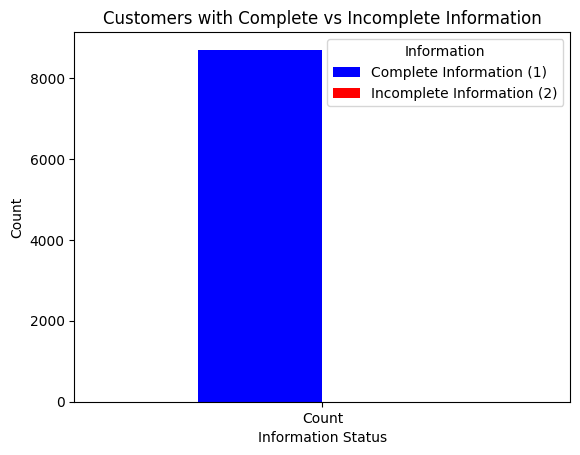

In [8]:
# Count the occurrences of each category
customer_info_counts = df_cleaned['complete_customer_info'].value_counts()

# Create a DataFrame with both categories and their counts
customer_info_df = pd.DataFrame({'Complete Information (1)': [customer_info_counts.get(1, 0)],
                                 'Incomplete Information (2)': [customer_info_counts.get(2, 0)]},
                                index=['Count'])

# Plot the bar chart
plt.figure(figsize=(8, 6))
customer_info_df.plot(kind='bar', color=['blue', 'red'])
plt.title('Customers with Complete vs Incomplete Information')
plt.xlabel('Information Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Information')
plt.show()


## Prepare Data - Continued

➡️ Assignment Tasks
- Create seasonal buckets for Winter, Sprint, Summer, Fall
- Create a chart to show revenue by season
- Create a chart to show revenue by year

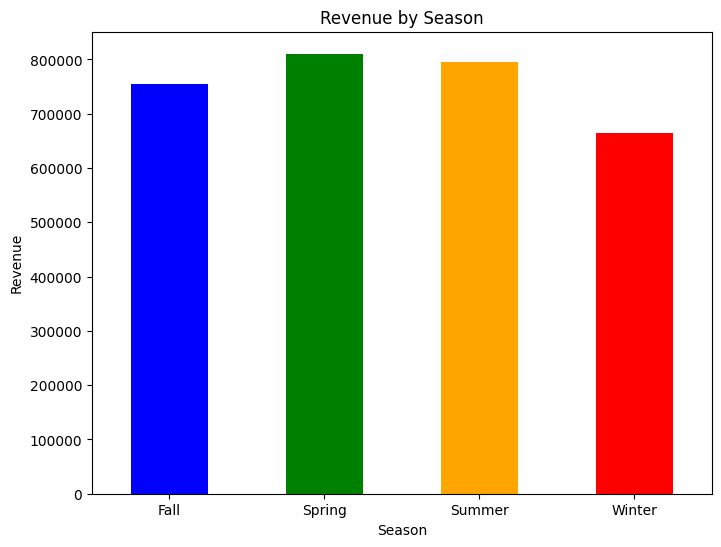

In [9]:
#seasonality
df_cleaned['order_date'] = pd.to_datetime(df_cleaned['order_date'])

# Define a function to extract the season from the order date
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Extract the season from the order date
df_cleaned['season'] = df_cleaned['order_date'].dt.month.map(get_season)

# Aggregate revenue by season and by year
revenue_by_season = df_cleaned.groupby('season')['calculated_total_amount'].sum()
revenue_by_year = df_cleaned.groupby(df_cleaned['order_date'].dt.year)['calculated_total_amount'].sum()

# Plot revenue by season
plt.figure(figsize=(8, 6))
revenue_by_season.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title('Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.show()

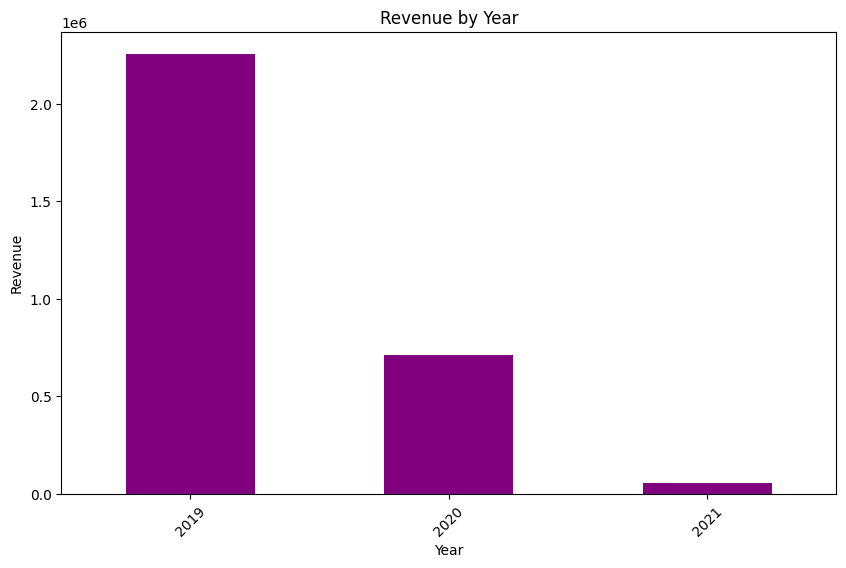

In [10]:
#revenue over time
plt.figure(figsize=(10, 6))
revenue_by_year.plot(kind='bar', color='purple')
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable that will group product lines into "Outdoor" versus "Indoor" products.
- Create a plot to show the correlation between outdoor/indoor versus season  

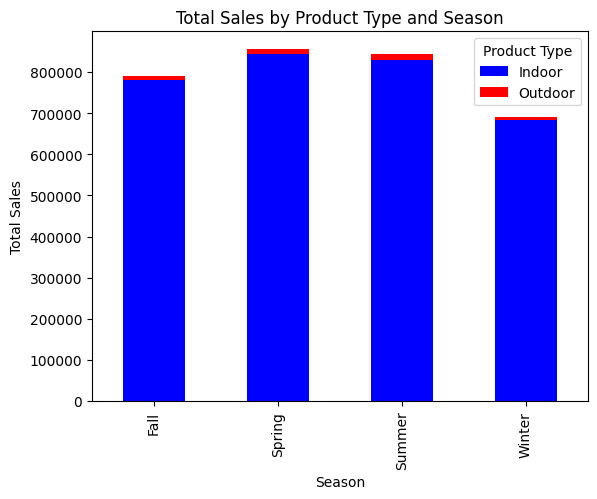

In [18]:
# Define a new categorization function with a broader approach
def categorize_product(product_name):
    product_name = product_name.lower()
    if 'extension cord' in product_name:  # Assuming extension cords can be used outdoors
        return 'Outdoor'
    else:
        return 'Indoor'  # Default category for all other products

# Apply the updated categorization function to the dataset
df_cleaned['product_type'] = df['product_name'].apply(categorize_product)

# Proceed with the rest of the analysis as before
pivot_table = df_cleaned.pivot_table(
    values='total_amount',
    index='season',
    columns='product_type',
    aggfunc='sum',
    fill_value=0
)

# Plot the updated pivot table as a bar chart with specified colors
colors = {'Indoor': 'blue', 'Outdoor': 'red'}  # We'll use these colors for the categories
pivot_table.plot(kind='bar', stacked=True, color=[colors.get(x) for x in pivot_table.columns])
plt.title('Total Sales by Product Type and Season')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.legend(title='Product Type')
plt.show()
